Linear Regression

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, mean_squared_error, r2_score

In [2]:
page_speeds=np.random.normal(3.0,2.0,1000)
purchase_amounts=100-(page_speeds+np.random.normal(0,0.1,1000))*3

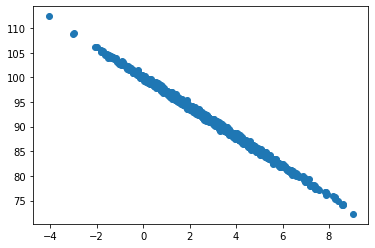

In [3]:
plt.scatter(page_speeds,purchase_amounts)

In [4]:
page_speeds=np.reshape(page_speeds,(-1,1))
purchase_amounts=np.reshape(purchase_amounts,(-1,1))

In [5]:
x_train,x_test,y_train,y_test=train_test_split(page_speeds,purchase_amounts,test_size=0.3)

In [6]:
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [7]:
y_pred=lr.predict(x_test)

In [8]:
lr.score(x_test,y_test)

0.9978350496766211

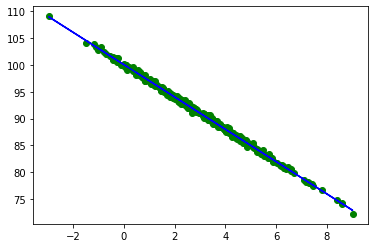

In [9]:
plt.scatter(x_test,y_test,color='g')
plt.plot(x_test,y_pred,color='b')
plt.show()

In [11]:
print('rmse = ',mean_squared_error(y_test,y_pred))
print('r2 = ',r2_score(y_test,y_pred))

rmse =  0.08269570185953021
r2 =  0.9978350496766212


Activity( Increasing Random Variation in the dataset and seeing its effect 

In [12]:
x=np.random.normal(1,0.1,1000)
y=x+50+np.random.normal(1,0.1,1000)

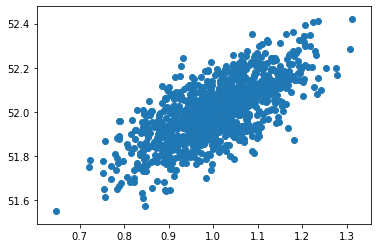

In [13]:
plt.scatter(x,y)

In [14]:
x=x.reshape(-1,1)
y=y.reshape(-1,1)

In [15]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

In [16]:
lr.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [17]:
y_pred=lr.predict(x_test)

In [18]:
lr.score(x_test,y_test)

0.48770187673869275

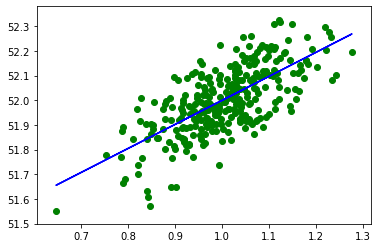

In [19]:
plt.scatter(x_test,y_test,color='g')
plt.plot(x_test,y_pred,color='b')
plt.show()

In [20]:
print('rmse = ',mean_squared_error(y_test,y_pred))
print('r2 = ',r2_score(y_test,y_pred))

rmse =  0.009687141782603765
r2 =  0.4877018767386927


Linear Regression on Boston Housing Dataset

In [21]:
from sklearn.datasets import load_boston
bost_data=load_boston()

In [24]:
bost_data.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [25]:
bost_data.DESCR

".. _boston_dataset:\n\nBoston house prices dataset\n---------------------------\n\n**Data Set Characteristics:**  \n\n    :Number of Instances: 506 \n\n    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.\n\n    :Attribute Information (in order):\n        - CRIM     per capita crime rate by town\n        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.\n        - INDUS    proportion of non-retail business acres per town\n        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)\n        - NOX      nitric oxides concentration (parts per 10 million)\n        - RM       average number of rooms per dwelling\n        - AGE      proportion of owner-occupied units built prior to 1940\n        - DIS      weighted distances to five Boston employment centres\n        - RAD      index of accessibility to radial highways\n        - TAX      full-value property-tax rate per $10,000

In [27]:
boston=pd.DataFrame(bost_data.data,columns=bost_data.feature_names)
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [28]:
boston['MEDV']=bost_data.target

In [29]:
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [30]:
boston.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

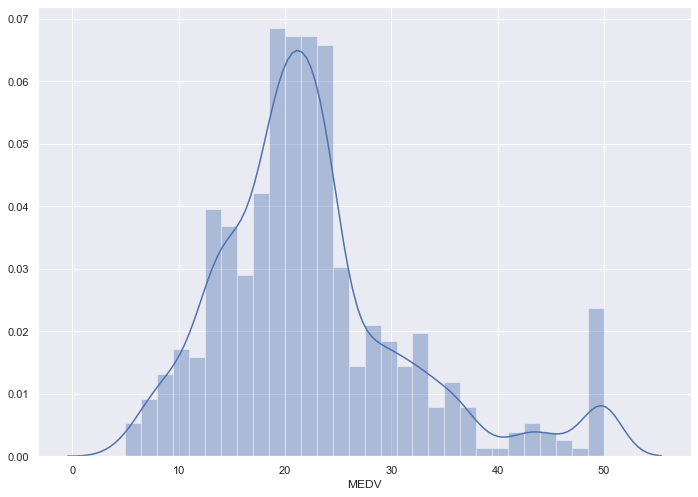

In [31]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(boston['MEDV'],bins=30)
plt.show()

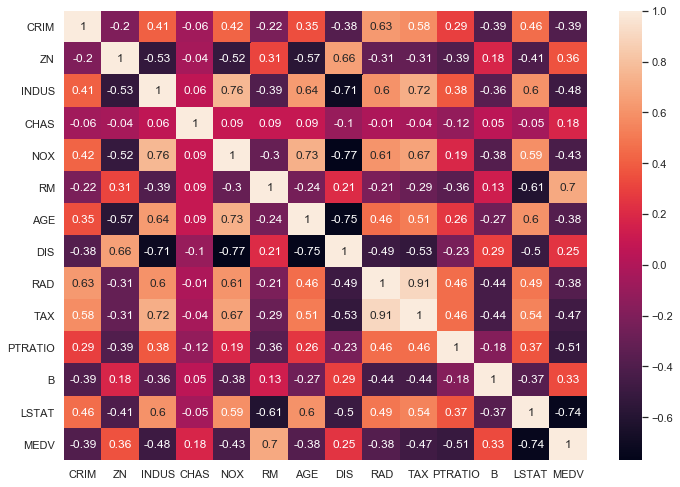

In [32]:
corr_matrix=boston.corr().round(2)
sns.heatmap(data=corr_matrix,annot=True)

Select those features which have a high correlation with target variable
(Rm has high +ve correlation whereas Lstat has high -ve correlation).
Avoid choosing features which are strongly correalted to each other.

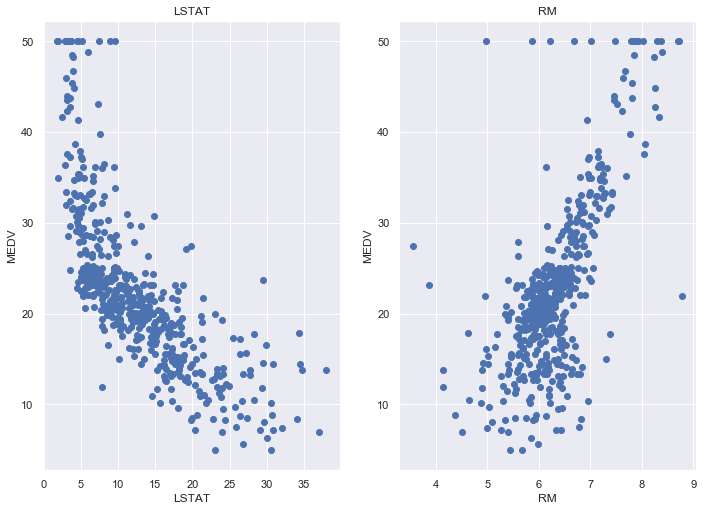

In [36]:
#Variation of features with target

features=['LSTAT','RM']
target=boston['MEDV']

i=0
for col in features:
    plt.subplot(1,len(features),i+1)
    x=boston[col]
    y=target
    plt.scatter(x,y,marker='o')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('MEDV')
    i+=1

In [37]:
x=pd.DataFrame(np.c_[boston['LSTAT'],boston['RM']],columns=['LSTAT','RM'])
y=boston['MEDV']

In [38]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [39]:
lr.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [41]:
y_pred=lr.predict(x_test)

In [45]:
r2_score(y_test,y_pred)

0.5558917246492757

In [47]:
np.sqrt(mean_squared_error(y_test,y_pred))

6.611483968203835